In [1]:
import struct
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
"""
This function reads the MNIST data from the IDX file format into numpy arrays

this relies on the fact that MNIST dataset consisntently uses unsigned types
with their data segments.
sc : https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40
"""

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [5]:
raw_train = read_idx('./jupyter/train-images.idx3-ubyte')
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx('./jupyter/train-labels.idx1-ubyte')

raw_test = read_idx('./jupyter/t10k-images.idx3-ubyte')
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx('./jupyter/t10k-labels.idx1-ubyte')

In [7]:
X_train = train_data
Y_train = train_label
X_test = test_data
Y_true = test_label

# Initialize the MLPClassifier with increased max_iter
mlp = MLPClassifier(hidden_layer_sizes=500, max_iter=200, alpha=0.1)
# tuning reference : https://dmkothari.github.io/Machine-Learning-Projects/MLP_with_MNIST.html

# Train the MLPClassifier
mlp.fit(X_train, Y_train)

# Predict the labels for the validation set
Y_pred = mlp.predict(X_test)



Confusion matrix, without normalization
Normalized confusion matrix


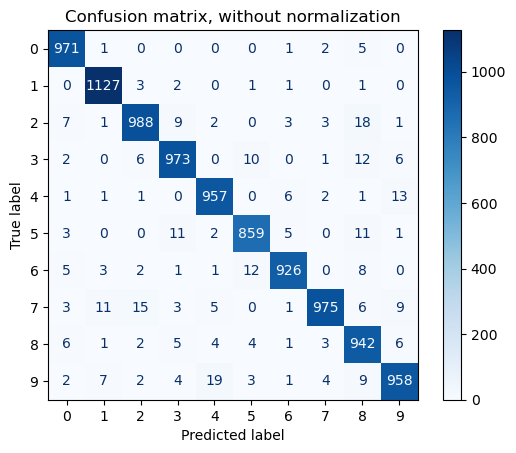

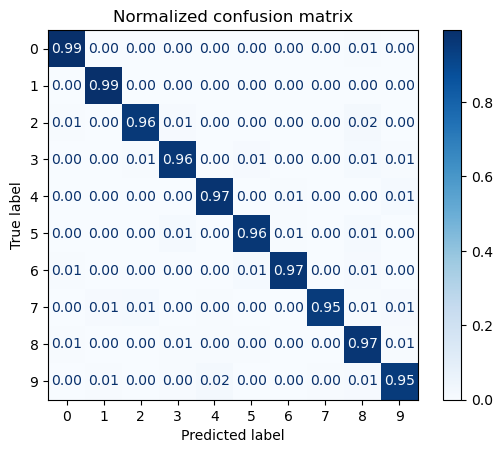

In [9]:
# Plot confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    values_format = ".2f" if normalize == "true" else None
    disp = ConfusionMatrixDisplay.from_predictions(
        Y_true,
        Y_pred,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format=values_format
    )
    disp.ax_.set_title(title)

    print(title)
    # print(disp.confusion_matrix)

plt.show()

In [12]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(Y_true, Y_pred)
print(f'Accuracy: {accuracy}')
print(f'Accuracy %: {accuracy*100}%')

Accuracy: 0.9676
Accuracy %: 96.76%


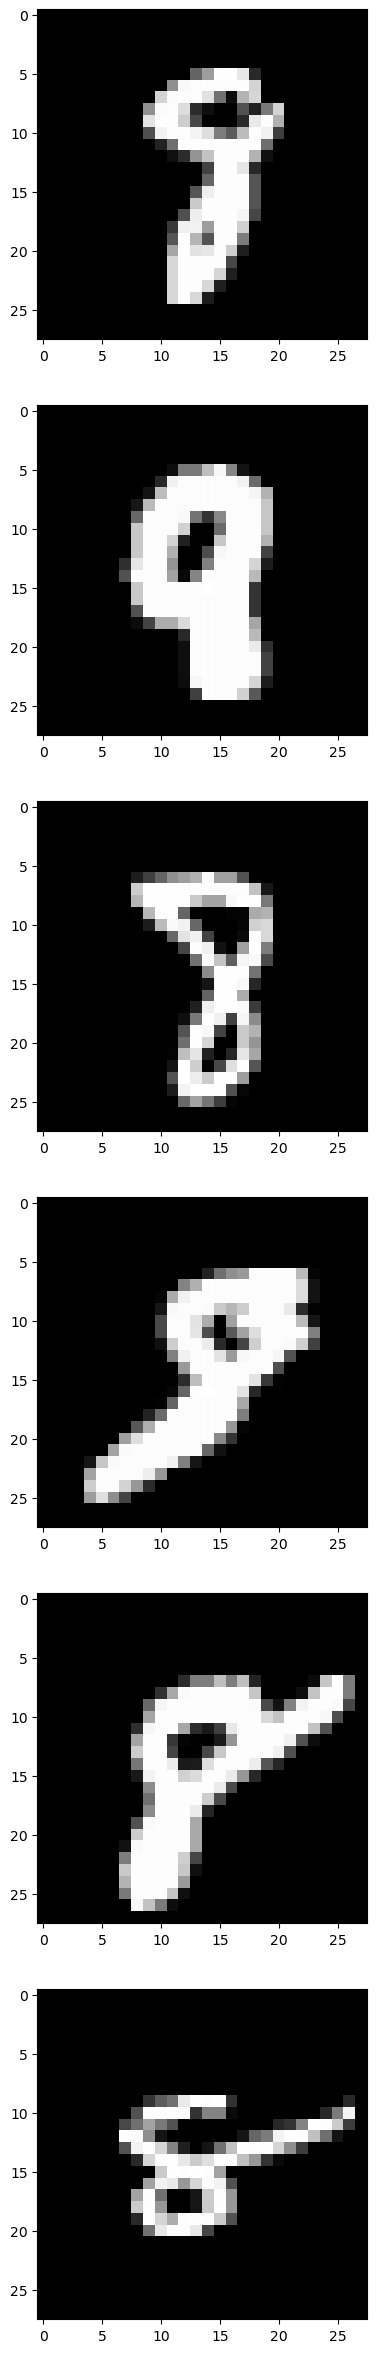

In [14]:
idx = np.where((Y_pred == 9) & (Y_true == 8))[0]
fig = plt.figure(figsize=(5, 30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(X_test[idx[i]].reshape(28, 28), cmap='gray')
    imgplot.set_interpolation('nearest')
    
plt.show()